In [3]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Serif"



In [4]:
def calculate_communications(configurations, edge_aggregations, num_edge_servers, global_rounds):
    """
    Calculate the total number of communications for each configuration.

    Parameters:
        configurations (dict): A dictionary containing cluster configurations with local iterations and number of clients.
        edge_aggregations (int): Number of edge aggregations before edge-to-cloud communication.
        num_edge_servers (int): Number of edge servers.
        global_rounds (int): Total number of global rounds.

    Returns:
        dict: A dictionary containing the total communications for each configuration.
    """
    results = {}

    for config_name, config in configurations.items():
        clusters = config["clusters"]
        local_iterations = config["local_iterations"]
        number_of_clients = config["number_of_clients"]

        # Calculate client-to-edge communications
        client_to_edge_comms = 0
        for k1, num_clients in zip(local_iterations, number_of_clients):
            cluster_comms = (num_clients * global_rounds * edge_aggregations) // k1
            client_to_edge_comms += cluster_comms

        # Calculate edge-to-cloud communications
        edge_to_cloud_comms = num_edge_servers * global_rounds

        # Total communications
        total_comms = client_to_edge_comms + edge_to_cloud_comms

        results[config_name] = {
            "Client-to-Edge Communications": client_to_edge_comms,
            "Edge-to-Cloud Communications": edge_to_cloud_comms,
            "Total Communications": total_comms
        }

    return results

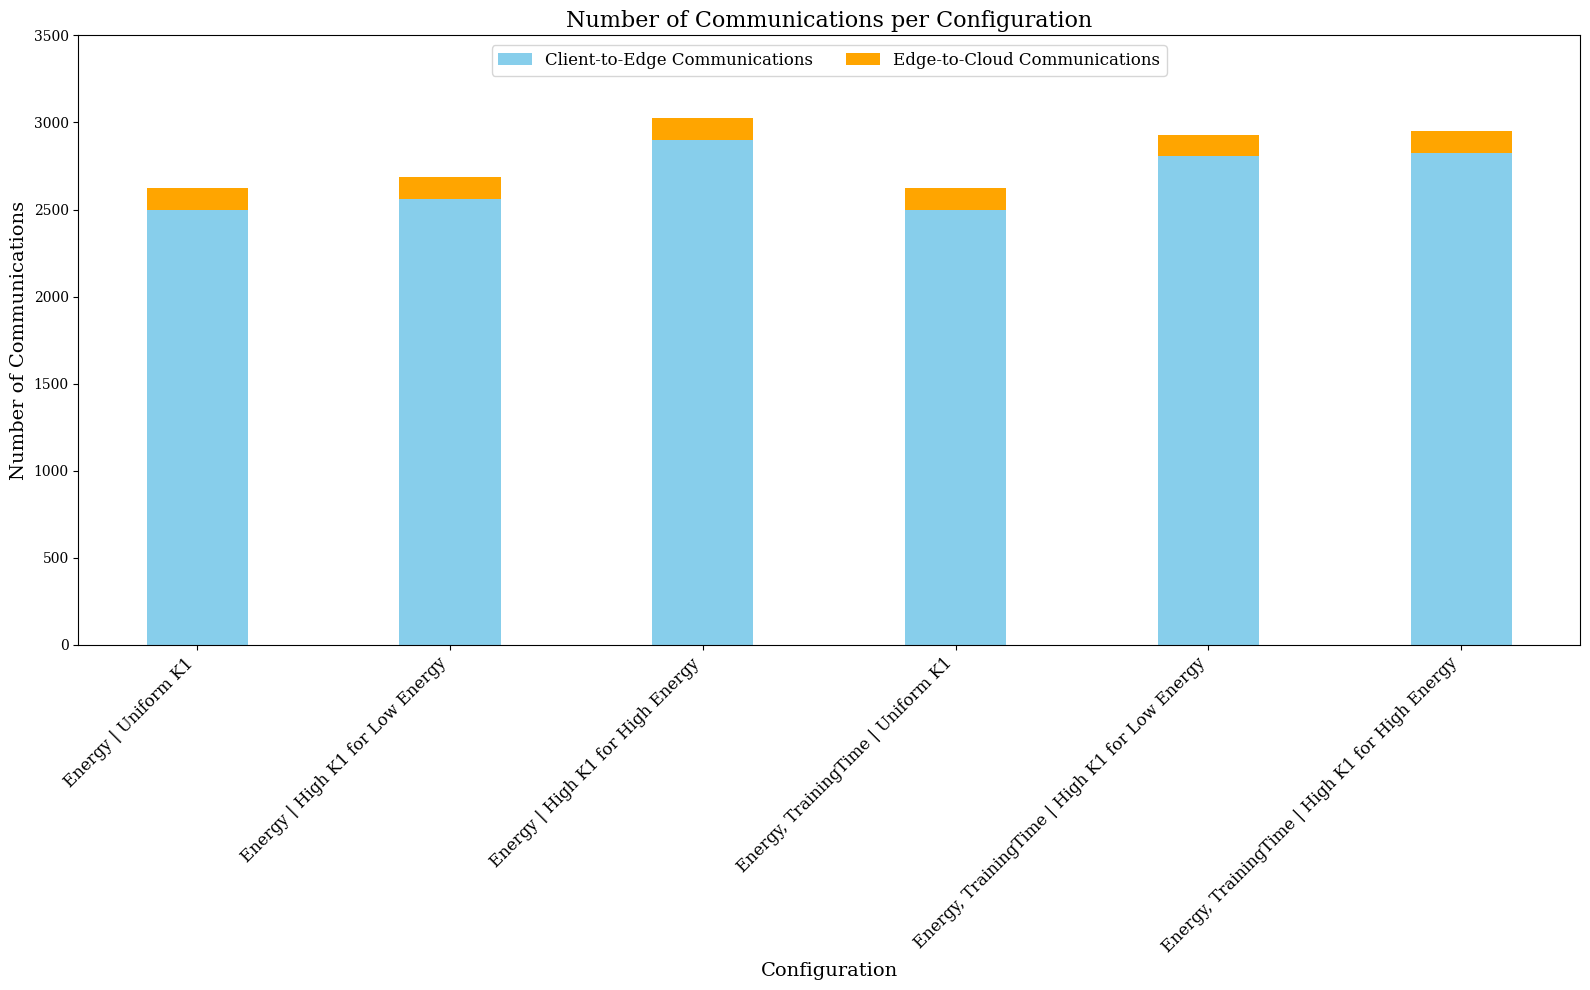

In [20]:
# Example Inputs
edge_aggregations = 10
num_edge_servers = 5
global_rounds = 25

configurations = {
    "Energy | Uniform K1": {
        "clusters": ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"],
        "local_iterations": [5, 5, 5, 5, 5],
        "number_of_clients": [11, 14, 10, 9, 6]
    },
    "Energy | High K1 for Low Energy": {
        "clusters": ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
        "local_iterations": [4, 7, 5, 6, 3],
        "number_of_clients": [11, 14, 10, 9, 6]
    },
    "Energy | High K1 for High Energy": {
        "clusters": ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
        "local_iterations": [6, 3, 5, 4, 7],
        "number_of_clients": [11, 14, 10, 9, 6]
    },
    "Energy, TrainingTime | Uniform K1": {
        "clusters": ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"],
        "local_iterations": [5, 5, 5, 5, 5],
        "number_of_clients": [15, 8, 15, 7, 5]
    },
    "Energy, TrainingTime | High K1 for Low Energy": {
        "clusters": ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
        "local_iterations": [3, 6, 7, 4, 5],
        "number_of_clients": [15, 8, 15, 7, 5]
    },
    "Energy, TrainingTime | High K1 for High Energy": {
        "clusters": ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
        "local_iterations": [7, 4, 3, 6, 5],
        "number_of_clients": [15, 8, 15, 7, 5],
    }
}

# Run the function
results = calculate_communications(configurations, edge_aggregations, num_edge_servers, global_rounds)

# Plotting the results
config_names = list(results.keys())
client_to_edge_comms = [comms['Client-to-Edge Communications'] for comms in results.values()]
edge_to_cloud_comms = [comms['Edge-to-Cloud Communications'] for comms in results.values()]
total_comms = [comms['Total Communications'] for comms in results.values()]

x = range(len(config_names))

plt.figure(figsize=(16, 10))
plt.bar(x, client_to_edge_comms, width=0.4, label='Client-to-Edge Communications', color='skyblue')
plt.bar(x, edge_to_cloud_comms, width=0.4, bottom=client_to_edge_comms, label='Edge-to-Cloud Communications', color='orange')

plt.xticks(x, config_names, rotation=45, ha='right', fontsize=12)
plt.xlabel("Configuration", fontsize=14)
plt.ylabel("Number of Communications", fontsize=14)
plt.ylim(0, 3500)
plt.title("Number of Communications per Configuration", fontsize=16)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0.92), ncol=2, fontsize=12)
plt.tight_layout()
plt.savefig("communications_per_configuration.png")
plt.show()
